# Clasificación No Convecional
## Práctica 0
Carlos Checa Moreno

# Ejercicio 3
Contenido del dataset: Conjunto de datos de teledetección de alta resolución (Quickbird). Un pequeño número de muestras de formación de árboles enfermos, un gran número de otras coberturas terrestres. Conjunto de datos de prueba de una muestra aleatoria estratificada de imagen.
El ejercicio consiste obtener un clasificador para clasificar las imágenes de árbol enfermos (clase positiva) de imágenes de otro tipo de cubierta (clase negativa). Hay 6 atributos, el primero es la clase: 'w' (diseased trees), 'n' (all other land cover), el segundo es GLCM_Pan: GLCM mean texture (Pan band), el tercero es Mean_G: Mean green value, el cuarto es Mean_R: Mean red value, el quinto es Mean_NIR: Mean NIR value
, y el sexto es SD_Pan: Standard deviation (Pan band). El dataset está en formato csv y se da por separado el conjunto test (testing.csv) y de entrenamiento (training.csv)
*   URL: https://archive.ics.uci.edu/ml/datasets/Wilt
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip

*Tomando como base el ejemplo 8 de los suministrados en clase, implementar un clasificador basado en Random Forest que contenga los siguientes apartados.
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify si las clases estuviesen desbalanceadas.
*   Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Obtener curva ROC y su área.
*   Obtener curva presición recall.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.

In [1]:
import pandas as pd

In [2]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
unzip wilt.zip

Archive:  wilt.zip
  inflating: testing.csv             
  inflating: training.csv            


--2025-01-21 19:40:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wilt.zip’

     0K .......... .......... .......... .......... ..........  408K
    50K .......... .......... .......... .......... ..........  803K
   100K .......... .....                                       95.8M=0.2s

2025-01-21 19:40:03 (626 KB/s) - ‘wilt.zip’ saved [118593]



In [3]:
wilt_train = pd.read_csv("/content/training.csv")
wilt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4339 non-null   object 
 1   GLCM_pan    4339 non-null   float64
 2   Mean_Green  4339 non-null   float64
 3   Mean_Red    4339 non-null   float64
 4   Mean_NIR    4339 non-null   float64
 5   SD_pan      4339 non-null   float64
dtypes: float64(5), object(1)
memory usage: 203.5+ KB


In [4]:
wilt_test = pd.read_csv("/content/testing.csv")
wilt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       500 non-null    object 
 1   GLCM_pan    500 non-null    float64
 2   Mean_Green  500 non-null    float64
 3   Mean_Red    500 non-null    float64
 4   Mean_NIR    500 non-null    float64
 5   SD_pan      500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [ ]:
#Antes de definir el clasificador habría que extraer las etiquetas, que están en la primera columna, de los conjuntos de entrenamiento
#y de test, y después habría que borrar esa primera columna de los conjuntos de entrenamiento y test

## Creación del modelo

In [5]:
# Inspección inicial
def preprocess_data(data):
    X = data.iloc[:, 1:]  # Atributos
    y = data.iloc[:, 0].map({'w': 1, 'n': 0})  # Etiquetas (1 para 'w', 0 para 'n')
    return X, y

X_train, y_train = preprocess_data(wilt_train)
X_test, y_test = preprocess_data(wilt_test)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
# Dividir en conjuntos de entrenamiento y validación con estratificación
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Crear pipeline con StandardScaler y RandomForestClassifier
pipeline = make_pipeline( StandardScaler(), RandomForestClassifier(random_state=42, n_estimators=100))

In [9]:
# Entrenamiento del modelo
pipeline.fit(X_train_split, y_train_split)

# Predicciones
y_val_pred = pipeline.predict(X_val)


## Evaluación modelo

In [13]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay)
# Métricas
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)

# Resultados
print("Resultados del Modelo:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Resultados del Modelo:
Accuracy: 0.9930875576036866
Precision: 0.9090909090909091
Recall: 0.6666666666666666
F1 Score: 0.7692307692307693
ROC AUC: 0.8327471668620554


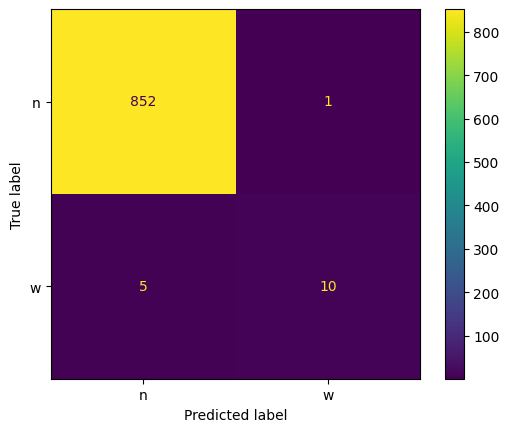

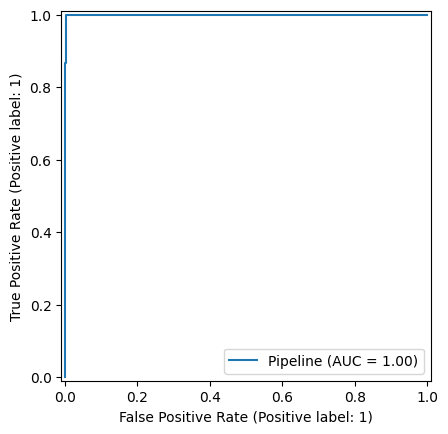

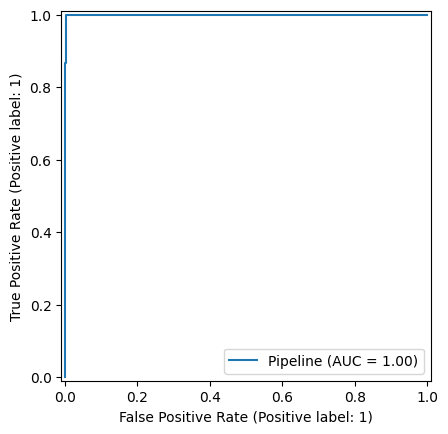

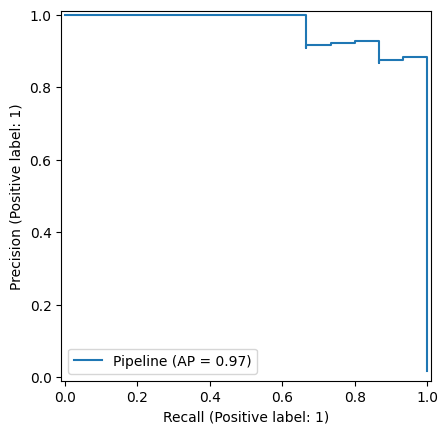

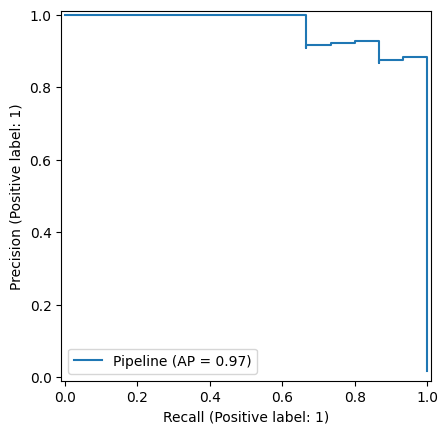

In [16]:
# Mostrar matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['n', 'w']).plot()

# Curva ROC
RocCurveDisplay.from_estimator(pipeline, X_val, y_val).plot()

# Curva de precisión-recall
PrecisionRecallDisplay.from_estimator(pipeline, X_val, y_val).plot()

## Párrafo explicativo
Para este ejercicio hay que empezar por preprocesar nuestros datos teniendo en cuenta que las etiquetas se encuentran en la primera columna de los datasets.

Después se dividen los datos de entrenamiento para obtener un conjunto de validación. A continuación, se crea una pipeline con el Scaler para terminar con el preprocesamiento de los datos y el clasificador RandomForest.

Para terminar se hace una evaluación del modelo obteniendo métricas como el accuracy, precisión o recall, al igual que se ha hecho en los anteriores ejercicios de esta práctica.

En cuanto a los resultados obtenidos:
*   Con un accuracy de 0.993 podemos ver que nuestro modelo clasifica correctamente la mayoría de las instancias,
tanto de la clase positiva como negativa. Esto indica un buen desempeño general.
*   La precisión de 0.909 indica que, de todas las instancias predichas como positivas, el modelo ha acertado en un porcentaje considerable. Sin embargo, la diferencia entre precisión y recall sugiere que hay un sesgo hacia la clase negativa.
*   El recall de 0.667 refleja que el modelo no identifica correctamente una proporción significativa de árboles enfermos (clase positiva), es decir, deja pasar muchos positivos reales como negativos.
*   El F1 Score de 0.769, al ser más bajo que el accuracy, evidencia que el modelo no logra un balance ideal entre precisión y recall.
*   Finalmente, un ROC AUC de 0.833 indica que el modelo tiene una buena capacidad de discriminar entre clases positivas y negativas.